In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import pickle
import sklearn
import scipy
from pandasql import *
from pandasql import sqldf
from datetime import datetime
from pandas.io.json import json_normalize
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from collections import OrderedDict
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, scale
from statsmodels.regression.linear_model import OLS as reg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import Imputer
plt.rcParams['figure.figsize'] = 9,7

In [28]:
def rmse(Y_test,Y_pred):   
    return np.sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred))

In [198]:
zzz='''
<br>                            newline
**text**                        bold
# text, ## text, ### text       heading
_text_                          italicize
+ text                          bullet

m                               markdown 
y                               code
c                               copy   
v                               paste
b                               insert cell below
a                               insert cell above 

File Locations '/Users/Work/Desktop/Work/Projects/ESMdata'
'''

**Data location** <br>
https://osf.io/c6xt4/

**Abstract** <br>
"We present a dataset of a single (N = 1) participant diagnosed with major depressive disorder, who completed 1478 measurements over the course of 239 consecutive days in 2012 and 2013. The experiment included a double-blind phase in which the dosage of anti-depressant medication was gradually reduced. The entire study looked at momentary affective states in daily life before, during, and after the double-blind phase. The items, which were asked ten times a day, cover topics like mood, physical condition and social contacts. Also, depressive symptoms were measured on a weekly basis using the Symptom Checklist Revised (SCL-90-R). The data are suitable for various time-series analyses and studies in complex dynamical systems."


**How to Cite:**<br>
Kossakowski, J.J. et al., (2017). Data from ‘Critical Slowing Down as a Personalized Early Warning Signal for Depression’. Journal of Open Psychology Data. 5(1), p.1. DOI: http://doi.org/10.5334/jopd.29

In [29]:
esm = pd.read_excel('/Users/Work/Desktop/Work/Projects/ESMdata/ESMdata.xlsx'\
                    ,sheetname='Sheet1')

In [ ]:
esm.head(1)

In [19]:
esm.shape

(1476, 85)

In [202]:
missing_count=esm.isnull().sum(axis=0)

In [203]:
esm.describe().transpose().head(12)

,count,mean,std,min,25%,50%,75%,max
phase,1476.0,3.562331,1.331054,1.0,3.0,4.0,5.0,5.0
concentrat,1476.0,40.596883,59.382947,0.0,0.0,0.0,73.0,150.0
dayno,1476.0,198.859079,123.956473,1.0,61.0,252.0,303.0,366.0
beepno,1476.0,5.239837,2.892081,1.0,3.0,5.0,8.0,10.0
resp_abort,1474.0,0.003392,0.058163,0.0,0.0,0.0,0.0,1.0
mood_relaxed,1476.0,4.173442,0.754466,1.0,4.0,4.0,5.0,7.0
mood_down,1474.0,0.178426,0.744326,-3.0,0.0,0.0,0.0,3.0
mood_irritat,1473.0,2.241005,1.169542,1.0,1.0,2.0,3.0,7.0
mood_satisfi,1473.0,4.202987,0.986425,1.0,3.0,4.0,5.0,6.0
mood_lonely,1474.0,-0.007463,0.490866,-3.0,0.0,0.0,0.0,3.0


In [30]:
Y=esm.phase
X1=esm.drop('phase',axis=1)
X2=X1.iloc[:,8:-14].drop(['soc_who1','soc_who2','soc_who3','act_what1','act_what2','event_cause',
                     'event_concern','event_pertain',],axis=1)
X2.isnull().sum(axis=0).sort_values(ascending=False).head(20)

event_freq         1034
soc_together        802
soc_prefalone       802
soc_pleasant        802
soc_belong          802
soc_prefcomp        678
soc_enjoy_alone     678
mor_med             591
mor_qualsleep       584
mor_lieawake        584
mor_nrwakeup        584
mor_asleep          584
mor_feellike        584
evn_ordinary        262
evn_niceday         262
evn_inflmood        262
evn_pager           262
evn_work            262
evn_med             262
event_disturb         7
dtype: int64

In [31]:
X3=X2.drop(['event_freq','soc_together','soc_prefalone','soc_pleasant','soc_belong',\
        'soc_prefcomp','soc_enjoy_alone','mor_med','mor_qualsleep','mor_lieawake',\
       'mor_nrwakeup','mor_asleep','mor_feellike','evn_ordinary','evn_niceday',\
       'evn_inflmood','evn_pager','evn_work','evn_med','event_disturb'],axis=1)
X3.isnull().sum(axis=0).sort_values(ascending=False).head()

event_import    5
phy_nauseous    5
event_pleas     5
phy_hungry      5
phy_pain        5
dtype: int64

In [32]:
#fit_transform returns a new dataframe X_new, rather than changing the original X
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
X = pd.DataFrame(fill_NaN.fit_transform(X3))
X.columns = X3.columns
X.index = X3.index

In [33]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split\
(X, Y, test_size=0.30, random_state = 5)

m = ols('Y_train ~ X_train', X_train).fit()
print m.summary()

                            OLS Regression Results                            
Dep. Variable:                Y_train   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     17.07
Date:                Thu, 23 Feb 2017   Prob (F-statistic):           5.12e-77
Time:                        17:49:21   Log-Likelihood:                -1528.9
No. Observations:                1033   AIC:                             3128.
Df Residuals:                     998   BIC:                             3301.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.7381      1.132     -0.652      

In [34]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred=lm.predict(X_test)
rmse(Y_test,Y_pred)

1.3307072344061424

# Random Forests

In [108]:
RANDOM_STATE=5
from sklearn.grid_search import GridSearchCV
clf=RandomForestRegressor(warm_start=True, oob_score=True,random_state=RANDOM_STATE,
                         n_estimators=300)
parameters={"max_features":[None,'sqrt',.1,.2,.3,.4,.5,.6,.7,.8,.9]}
fitmodel = GridSearchCV(clf, param_grid=parameters, cv=5, scoring="neg_mean_squared_error")
fitmodel.fit(X_train, Y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=True, random_state=5,
            verbose=0, warm_start=True),
 {'max_features': 'sqrt'},
 -1.1392470958875658,
 [mean: -1.22463, std: 0.21384, params: {'max_features': None},
  mean: -1.13925, std: 0.20092, params: {'max_features': 'sqrt'},
  mean: -1.15640, std: 0.19749, params: {'max_features': 0.1},
  mean: -1.14487, std: 0.20377, params: {'max_features': 0.2},
  mean: -1.15628, std: 0.20608, params: {'max_features': 0.3},
  mean: -1.16288, std: 0.22037, params: {'max_features': 0.4},
  mean: -1.18252, std: 0.22060, params: {'max_features': 0.5},
  mean: -1.19483, std: 0.21287, params: {'max_features': 0.6},
  mean: -1.20385, std: 0.21778, params: {'max_features': 0.7},
  mean: -1.21401, st

In [129]:
rf=RandomForestRegressor(warm_start=True, oob_score=True,random_state=RANDOM_STATE,
                         n_estimators=300, max_features=fitmodel.best_params_['max_features'])
rf.fit(X_train,Y_train)
pickle.dump(rf, open('ESM_RF.sav', 'wb'))

In [130]:
rf = pickle.load(open('ESM_RF.sav', 'rb'))
Y_pred=rf.predict(X_test)
rmse(Y_test,Y_pred)

0.99889785926193286

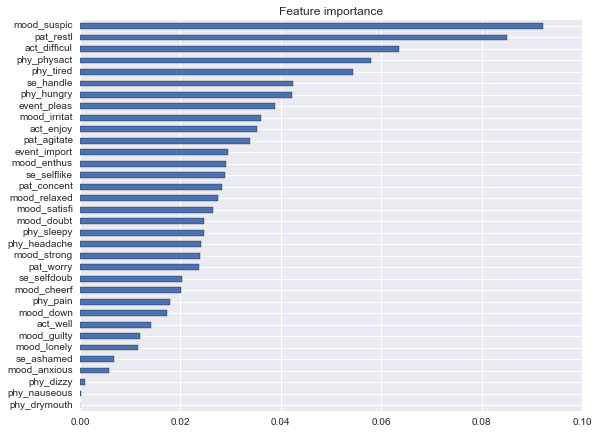

In [132]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.sort_values(inplace=True, ascending=True)
feat_imp.plot(kind='barh', title='Feature importance')

# Gradient Boosted Regression Trees

In [117]:
parameters={'min_samples_split': 2,'n_estimators':300,'random_state':RANDOM_STATE}
clf = ensemble.GradientBoostingRegressor(**parameters)
parameters_grid={'max_depth':[4,6,8,10], 
                'learning_rate':[x/300.0 for x in range(2,11)],
                'subsample':[.5,.75,1],'max_features':[.4,.6,.8,1]}
fitmodel = GridSearchCV(clf, param_grid=parameters_grid, cv=5, scoring="neg_mean_squared_error")
fitmodel.fit(X_train, Y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.0233333333333, loss='ls', max_depth=4,
              max_features=0.4, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=5,
              subsample=0.5, verbose=0, warm_start=False),
 {'learning_rate': 0.023333333333333334,
  'max_depth': 4,
  'max_features': 0.4,
  'subsample': 0.5},
 -1.0664522197271245,
 [mean: -1.18552, std: 0.18724, params: {'max_features': 0.4, 'subsample': 0.5, 'learning_rate': 0.006666666666666667, 'max_depth': 4},
  mean: -1.19422, std: 0.18932, params: {'max_features': 0.4, 'subsample': 0.75, 'learning_rate': 0.006666666666666667, 'max_depth': 4},
  mean: -1.20642, std: 0.19127, params: {'max_features': 0.4, 'subsample': 1, 'learning_rate': 0.006666666666666667, 'max_depth': 4},
  mean: -1.18126, std: 

In [134]:
parameters={'n_estimators': 300, 
            'max_depth': fitmodel.best_params_['max_depth'], 
            'min_samples_split': 2,
            'learning_rate': fitmodel.best_params_['learning_rate'], 'loss': 'ls',
            'subsample': fitmodel.best_params_['subsample'],
            'max_features':fitmodel.best_params_['max_features'], 'random_state':RANDOM_STATE}
gb= ensemble.GradientBoostingRegressor(**parameters)
gb.fit(X_train,Y_train)
pickle.dump(gb, open('ESM_GBRT.sav', 'wb'))

In [135]:
gb = pickle.load(open('ESM_GBRT.sav', 'rb'))
Y_pred=gb.predict(X_test)
rmse(Y_test,Y_pred)

1.0076354952031434

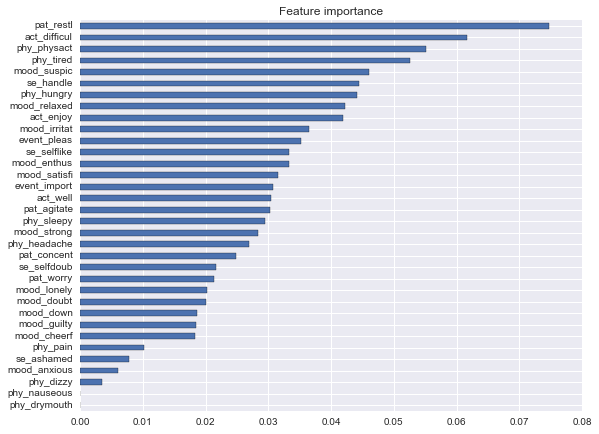

In [136]:
feat_imp = pd.Series(gb.feature_importances_, index=X.columns)
feat_imp.sort_values(inplace=True, ascending=True)
feat_imp.plot(kind='barh', title='Feature importance')

In [35]:
from pandasql import sqldf
sql = lambda q: sqldf(q, globals()) 
#add to script so you don't have to call locals

In [36]:
#What is the partipant's average cheerfulness level for each level of naeuseousness?
q='''
SELECT AVG(m.mood_cheerf), COUNT(*)
FROM esm m
GROUP BY phy_nauseous
'''
sql(q)

,AVG(m.mood_cheerf),COUNT(*)
0,4.000000,5
1,4.087432,1464
2,4.166667,6
3,3.000000,1


In [76]:
#Make a frequency table of mood_relaxed
q='''
SELECT x.mood_relaxed, COUNT(*) COUNT
FROM X As x
GROUP BY mood_relaxed
ORDER BY COUNT DESC
'''
sql(q)

,mood_relaxed,COUNT
0,4.0,714
1,5.0,510
2,3.0,218
3,2.0,24
4,6.0,6
5,1.0,2
6,7.0,2


The information associated with this data says that mood_relaxed should range from 1-7, so it is interesting that it appears to range from 0-6.  